<a href="https://colab.research.google.com/github/Varun0801/MachineLearning/blob/master/Stock_Market_Price_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
cd /content/drive/My Drive/Stock Files


/content/drive/My Drive/Stock Files


In [62]:
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [63]:
data = pd.read_csv('/content/drive/My Drive/Stock Files/ADANIPORTS.csv')
data

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.00,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.00,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.00,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.00,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.00,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3152,2020-08-25,ADANIPORTS,EQ,349.00,351.90,352.00,341.00,345.40,346.10,345.32,3532971,1.219989e+14,45969.0,819767,0.2320
3153,2020-08-26,ADANIPORTS,EQ,346.10,346.35,366.90,346.35,352.80,354.25,359.39,11568961,4.157716e+14,119740.0,1906572,0.1648
3154,2020-08-27,ADANIPORTS,EQ,354.25,356.00,357.45,349.55,350.85,350.55,353.96,2996658,1.060691e+14,38053.0,1114640,0.3720
3155,2020-08-28,ADANIPORTS,EQ,350.55,355.00,363.00,348.50,359.55,360.05,356.19,5406554,1.925763e+14,61052.0,1416576,0.2620


In [64]:
data1 = data.copy()
data1

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.00,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.00,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.00,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.00,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.00,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3152,2020-08-25,ADANIPORTS,EQ,349.00,351.90,352.00,341.00,345.40,346.10,345.32,3532971,1.219989e+14,45969.0,819767,0.2320
3153,2020-08-26,ADANIPORTS,EQ,346.10,346.35,366.90,346.35,352.80,354.25,359.39,11568961,4.157716e+14,119740.0,1906572,0.1648
3154,2020-08-27,ADANIPORTS,EQ,354.25,356.00,357.45,349.55,350.85,350.55,353.96,2996658,1.060691e+14,38053.0,1114640,0.3720
3155,2020-08-28,ADANIPORTS,EQ,350.55,355.00,363.00,348.50,359.55,360.05,356.19,5406554,1.925763e+14,61052.0,1416576,0.2620


In [65]:
data1 = data.sort_values('Date')
data1

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.00,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.00,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.00,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.00,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.00,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3152,2020-08-25,ADANIPORTS,EQ,349.00,351.90,352.00,341.00,345.40,346.10,345.32,3532971,1.219989e+14,45969.0,819767,0.2320
3153,2020-08-26,ADANIPORTS,EQ,346.10,346.35,366.90,346.35,352.80,354.25,359.39,11568961,4.157716e+14,119740.0,1906572,0.1648
3154,2020-08-27,ADANIPORTS,EQ,354.25,356.00,357.45,349.55,350.85,350.55,353.96,2996658,1.060691e+14,38053.0,1114640,0.3720
3155,2020-08-28,ADANIPORTS,EQ,350.55,355.00,363.00,348.50,359.55,360.05,356.19,5406554,1.925763e+14,61052.0,1416576,0.2620


In [66]:
data1.isnull().sum()

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
dtype: int64

In [67]:
data1.shape[0]

3157

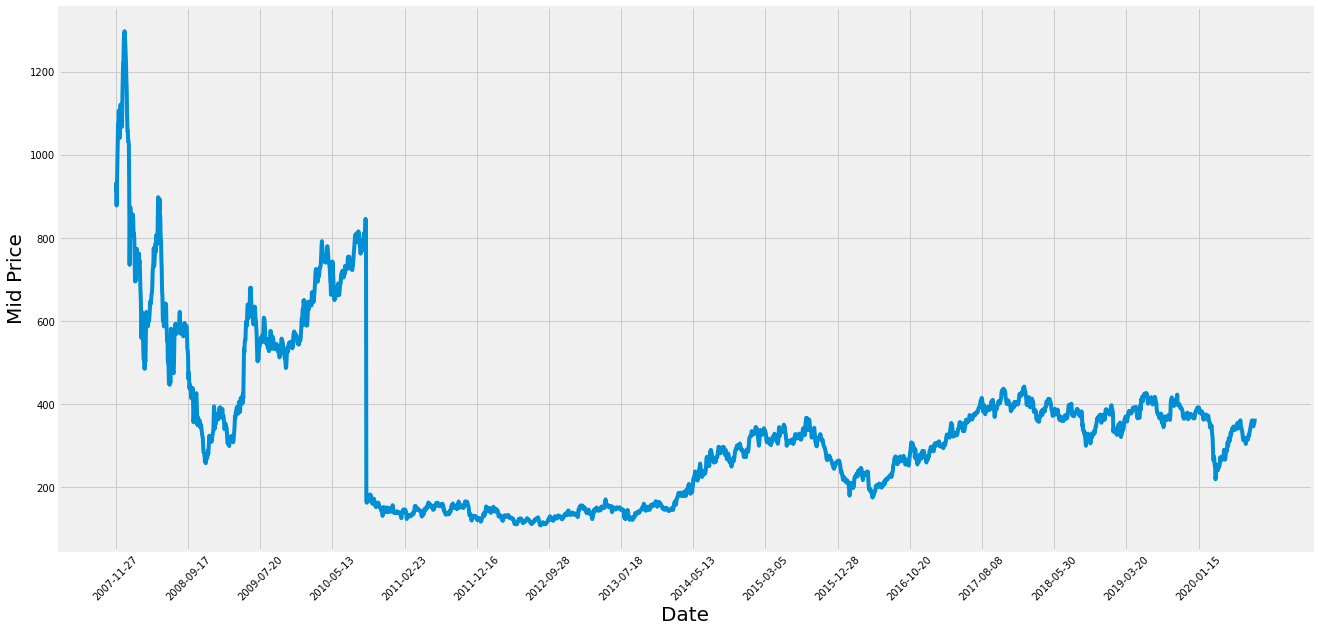

In [68]:
plt.figure(figsize=(20,10))
plt.plot(range(data1.shape[0]),(data1['High'] + data1['Low'])/2.0)
plt.xticks(range(0,plot1.shape[0],200),data1['Date'].loc[::200],rotation=45)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Mid Price',fontsize=20)
plt.show()

In [69]:
#Data Preprocessing
data1['Date'] = data1.index
data2 = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
data2['Date'] = data1['Date']
data2['Open'] = data1['Open']
data2['High'] = data1['High']
data2['Low'] = data1['Low']
data2['Close'] = data1['Close']
train_set = data2.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []
for i in range(60, 3157):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [71]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [72]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 15, batch_size = 32)

Epoch 1/15
97/97 [==============================] - 6s 57ms/step - loss: 0.0050
Epoch 2/15
97/97 [==============================] - 6s 58ms/step - loss: 0.0019
Epoch 3/15
97/97 [==============================] - 6s 57ms/step - loss: 0.0017
Epoch 4/15
97/97 [==============================] - 6s 58ms/step - loss: 0.0016
Epoch 5/15
97/97 [==============================] - 6s 58ms/step - loss: 0.0013
Epoch 6/15
97/97 [==============================] - 6s 58ms/step - loss: 0.0014
Epoch 7/15
97/97 [==============================] - 6s 58ms/step - loss: 0.0013
Epoch 8/15
97/97 [==============================] - 6s 59ms/step - loss: 0.0012
Epoch 9/15
97/97 [==============================] - 6s 58ms/step - loss: 0.0012
Epoch 10/15
97/97 [==============================] - 6s 58ms/step - loss: 0.0010
Epoch 11/15
97/97 [==============================] - 6s 58ms/step - loss: 9.9184e-04
Epoch 12/15
97/97 [==============================] - 6s 58ms/step - loss: 9.2196e-04
Epoch 13/15
97/97 [==========

In [76]:
testdataframe = pd.read_csv('/content/drive/My Drive/Stock Files/ADANIPORTS.csv')
testdataframe['Date'] = testdataframe.index
testdata = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
testdata['Date'] = testdataframe['Date']
testdata['Open'] = testdataframe['Open']
testdata['High'] = testdataframe['High']
testdata['Low'] = testdataframe['Low']
testdata['Close'] = testdataframe['Close']
real_stock_price = testdata.iloc[:, 1:2].values
dataset_total = pd.concat((data2['Open'], testdata['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(testdata) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 3157):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [77]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

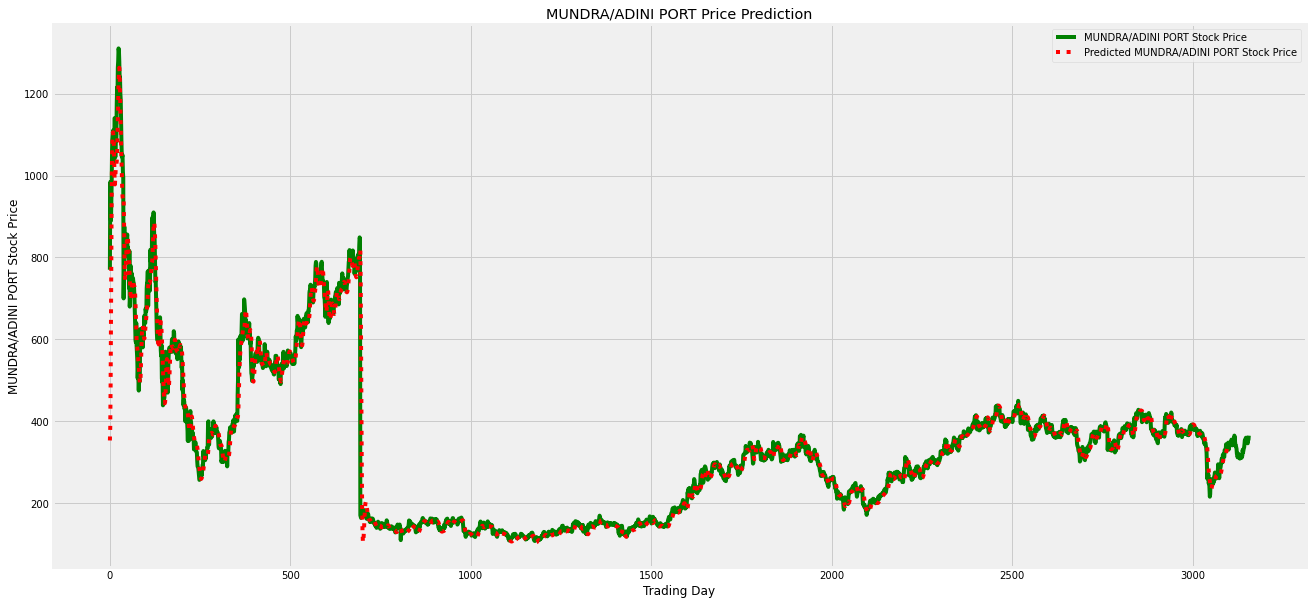

In [79]:
plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = 'MUNDRA/ADINI PORT Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted MUNDRA/ADINI PORT Stock Price',linestyle=':')
plt.title('MUNDRA/ADINI PORT Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('MUNDRA/ADINI PORT Stock Price')
plt.legend()
plt.show()